## Especialização em Inteligência Artificial – IFMG
## Análise de Séries Temporais - Atividade Final
**Aluno**: Alexandre Fortes Santana  

**Professor**: Carlos Severiano

A atividade consiste em aplicar alguma técnica de previsão de séries temporais (aprendida ou não na disciplina) a algum problema. Por exemplo, aplicar um modelo ARIMA a séries temporais de dados financeiros. Vocês têm total liberdade para escolher o problema a ser abordado!  

Para isso, vocês devem primeiramente escolher uma base de dados a ser utilizada como estudo. Para facilitar na busca de dados para o trabalho, existem muitos sites que fornecem bases de dados, normalmente usadas em Aprendizado de Máquina. Eles costumam ter a vantagem de oferecer uma base já armazenada em algum formato de arquivo que seja mais fácil de ser  processado a partir de linguagens de programação mais direcionadas para esse fim, como Python, R, dentre outras. Alguns exemplos de sites que possuem bases prontas:  

- https://www.kaggle.com/  
- https://www.drivendata.org/  
- https://github.com/owid  

Além disso, muitas séries temporais são armazenadas (e disponibilizadas em agências governamentais). Exemplos:  

- INPE: https://www.gov.br/inpe/pt-br/acesso-a-informacao/dados-abertos  
- IPEA: http://www.ipeadata.gov.br/Default.aspx  

O trabalho poderá ser desenvolvido a partir de python notebooks, como vimos em sala. Nele, pode ser utilizada a parte textual para apresentar o problema e tudo o que foi desenvolvido em cada parte do trabalho. Se preferirem, a descrição pode ficar em um arquivo à parte de documentação, como um relatório em pdf ou arquivo readme de repositórios github.

O que será avaliado no trabalho:  
- A descrição do problema abordado  
- A descrição da base de dados usada (atributos, classes) ou o ambiente escolhido  
- A correta aplicação da técnica  
- A análise dos resultados (experimentos, divisão treinamento e teste, métricas de validação)  
- A conclusão e indicação de trabalhos futuros  

As apresentações dos trabalhos ocorrerão na última aula da disciplina, no dia 13/12.  

Qualquer dúvida, fico à disposição!  

# Dataset

https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

**About Dataset**  
Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

Even more than with other data sets that Kaggle has featured, there’s a huge amount of data cleaning and preparation that goes into putting together a long-time study of climate trends. Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures

- LandAverageTemperature: global average land temperature in celsius  
- LandAverageTemperatureUncertainty: the 95% confidence interval around the average  
- LandMaxTemperature: global average maximum land temperature in celsius  
- LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature  
- LandMinTemperature: global average minimum land temperature in celsius  
- LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature  
- LandAndOceanAverageTemperature: global average land and ocean temperature in celsius  
- LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature  

Other files include:  

- Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv) 
- Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv) 
- Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv) 
- Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv) 

The raw data comes from the [Berkeley Earth](http://berkeleyearth.org/about/) data page.

# Entendimento dos Dados

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
file_path = 'earth-temperature/GlobalTemperatures.csv'
df = pd.read_csv(file_path)

# Converter a coluna 'Date' para datetime e configurar como índice
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

# Análise exploratória básica
print("Informações básicas do dataset:")

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(df.describe())

df.head()

Informações básicas do dataset:

Resumo estatístico das variáveis numéricas:
       LandAverageTemperature  LandAverageTemperatureUncertainty   
count             3180.000000                        3180.000000  \
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature   
count         1992.000000                    1992.000000         1992.000000  \
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


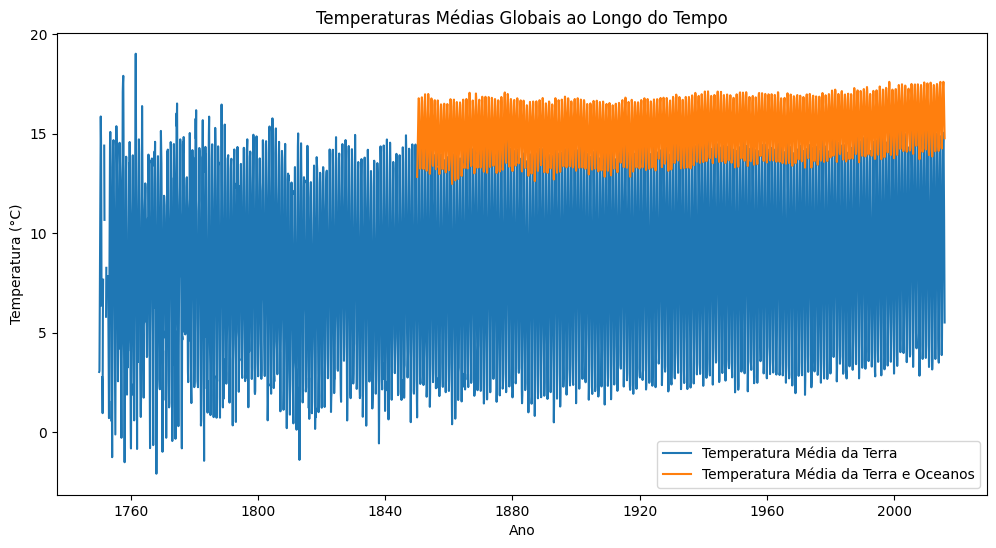

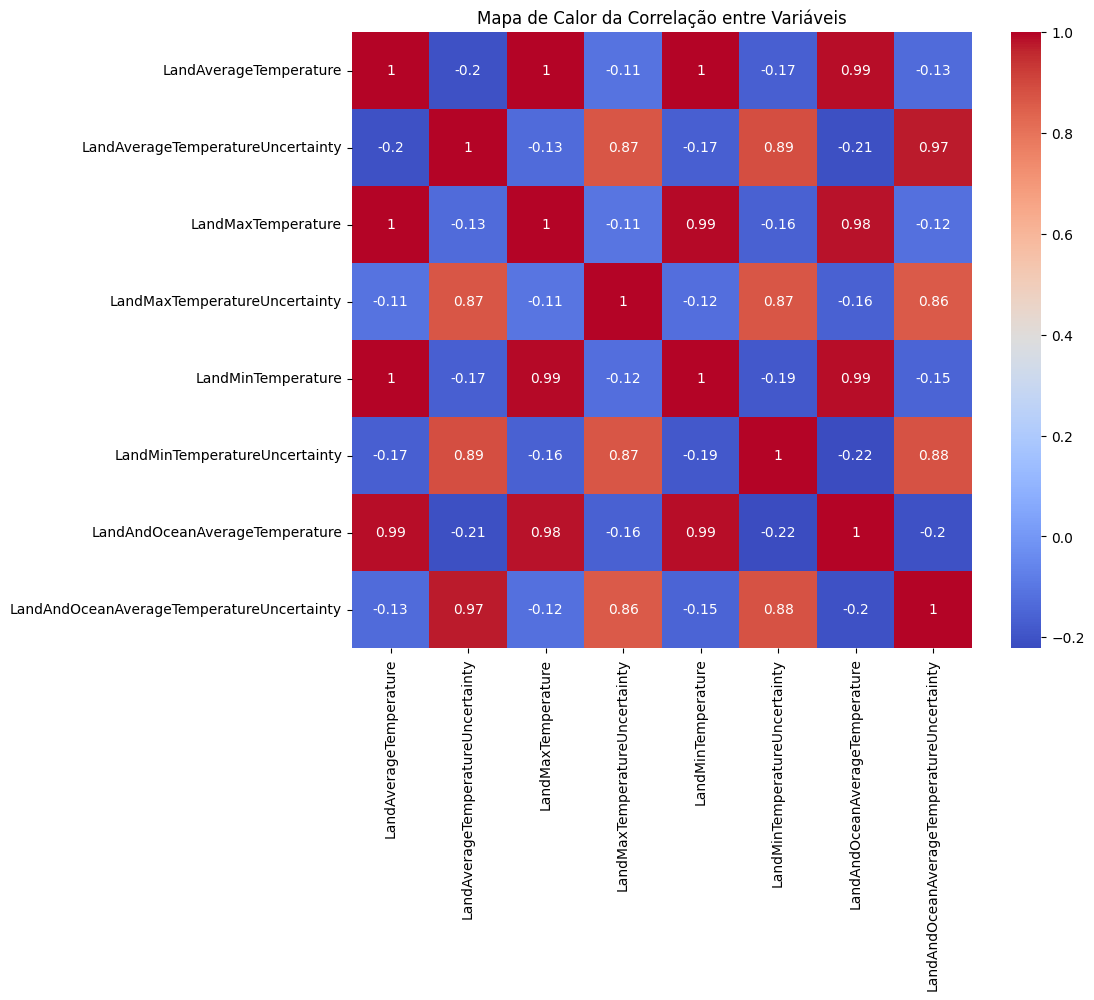

In [15]:
# Visualizações
# Plotando as temperaturas médias globais
plt.figure(figsize=(12, 6))
plt.plot(df['LandAverageTemperature'], label='Temperatura Média da Terra')
plt.plot(df['LandAndOceanAverageTemperature'], label='Temperatura Média da Terra e Oceanos')
plt.title('Temperaturas Médias Globais ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

1. **Estrutura do Dataset**:
   - O dataset contém 3.192 entradas, com datas variando de 1750 a 2015.
   - Existem 8 colunas, que incluem temperaturas médias da terra, incerteza nas temperaturas médias, temperaturas máximas e mínimas da terra, e temperaturas médias da terra e dos oceanos, junto com suas respectivas incertezas.

2. **Informações Estatísticas**:
   - As temperaturas médias da terra têm uma média de 8.37°C, com um mínimo de -2.08°C e um máximo de 19.02°C.
   - A temperatura média da terra e dos oceanos tem uma média de 15.21°C.
   - A incerteza nas medições também é fornecida, o que é crucial para análises climáticas, considerando a variabilidade e as mudanças nas metodologias de medição ao longo do tempo.

3. **Visualizações**:
   - Os gráficos mostram as variações nas temperaturas médias globais ao longo do tempo, tanto para a terra quanto para a terra e os oceanos combinados. Estas visualizações ajudam a identificar tendências e padrões ao longo do tempo.
   - O mapa de calor da correlação entre variáveis revela como diferentes medidas de temperatura estão relacionadas umas com as outras.

# Arima

## auto_arima

In [4]:
#file_path = 'earth-temperature/GlobalTemperatures.csv'
import pandas as pd

# Carregar os dados
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')

# Tratar a coluna de data e definir como índice
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

# Selecionar a série de temperaturas médias da terra e remover valores nulos
temperature_series = df['LandAverageTemperature'].dropna()

# Calcular o ponto de corte para 80/20 treino/teste
cutoff = int(len(temperature_series) * 0.8)

# Dividir os dados em treino e teste
train = temperature_series[:cutoff]
test = temperature_series[cutoff:]
# O conjunto 'train' agora está pronto para ser utilizado no auto_arima

## Validando se os dados estão preparados para o auto_arima:

- Verificar se há valores ausentes na série temporal.
- Confirmar que a série temporal é univariada, pois auto_arima é aplicado a séries univariadas.
- Verificar a estacionariedade da série temporal, pois séries não estacionárias podem precisar de diferenciação (que o auto_arima pode fazer automaticamente).
- Plotar a série temporal para visualizar se há tendências, sazonalidade ou outliers.

Checar por valores ausentes:
ok
Checar se a série temporal é univariada:
ok
Teste de Dickey-Fuller aumentado para verificar estacionariedade:
Valor-p do teste ADF: 1.2603654779949004e-05
ok


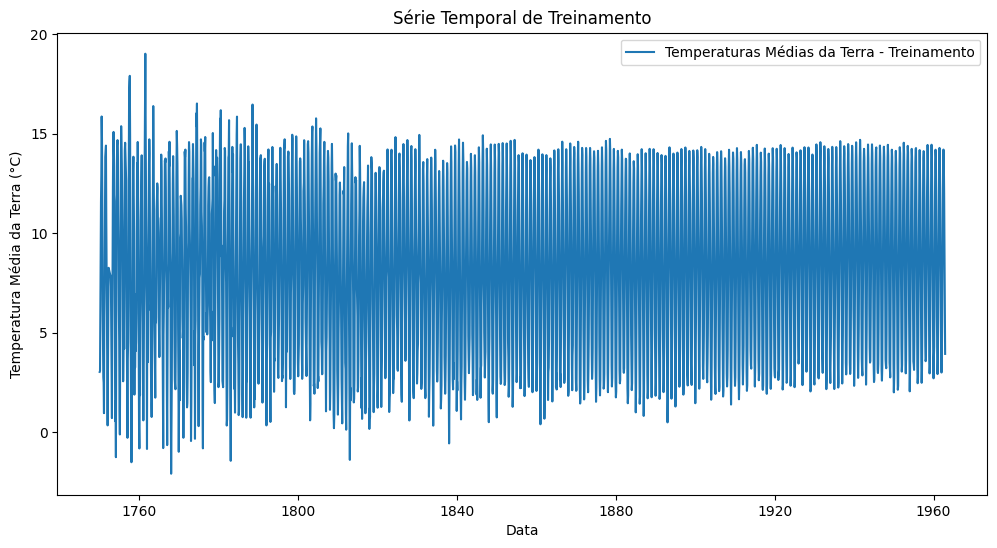

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Checar por valores ausentes
print('Checar por valores ausentes:')
if train.isnull().sum() > 0:
    raise ValueError("A série temporal de treinamento contém valores ausentes.")
else:
    print('ok')

# Checar se a série temporal é univariada
print('Checar se a série temporal é univariada:')
if not isinstance(train, pd.Series):
    raise ValueError("A série temporal de treinamento não é univariada.")
else:
    print('ok')

# Teste de Dickey-Fuller aumentado para verificar estacionariedade
print('Teste de Dickey-Fuller aumentado para verificar estacionariedade:')
adf_result = adfuller(train)
print(f"Valor-p do teste ADF: {adf_result[1]}")
if adf_result[1] > 0.05:
    print("A série temporal pode não ser estacionária e pode precisar de diferenciação.")
else:
    print('ok')

# Plotar a série temporal de treinamento
plt.figure(figsize=(12, 6))
plt.plot(train, label='Temperaturas Médias da Terra - Treinamento')
plt.title('Série Temporal de Treinamento')
plt.xlabel('Data')
plt.ylabel('Temperatura Média da Terra (°C)')
plt.legend()
plt.show()

## Treinando o modelo e avaliando o desempenho para a base de testes

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

RMSE: 0.9485496321919179
MAE: 0.7425032289063785


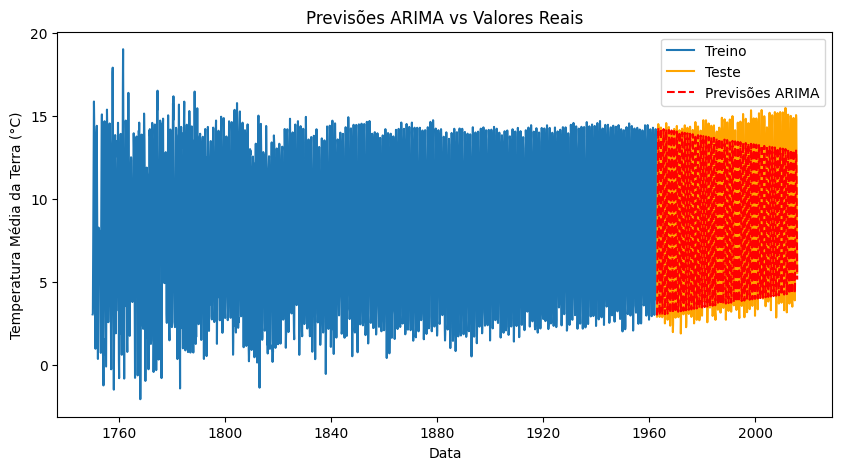

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# As variáveis 'train' e 'test' já foram definidas nos blocos anteriores
# Encontrar os melhores parâmetros para o modelo ARIMA com auto_arima
auto_arima_model = auto_arima(train, start_p=0, start_q=0,
                              max_p=5, max_q=5, m=12,
                              seasonal=False, trace=False,
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True)

# Treinar o modelo ARIMA com os melhores parâmetros encontrados
arima_model = ARIMA(train, order=auto_arima_model.order)
arima_model_fit = arima_model.fit()

# Fazer previsões no intervalo do conjunto de teste
# Para isso, precisamos saber a quantidade de pontos de dados no conjunto de teste
n_periods = len(test)

# A função predict no statsmodels requer o índice inicial e final da previsão
# Vamos prever para o intervalo correspondente ao conjunto de teste
start = len(train)
end = start + n_periods - 1  # -1 porque o intervalo é inclusivo

# Fazer previsões
predictions = arima_model_fit.predict(start=start, end=end)

# Calcular as métricas de desempenho
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

# Exibir métricas
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Teste', color='orange')
plt.plot(test.index, predictions, label='Previsões ARIMA', color='red', linestyle='--')
plt.title('Previsões ARIMA vs Valores Reais')
plt.xlabel('Data')
plt.ylabel('Temperatura Média da Terra (°C)')
plt.legend()
plt.show()

## Prevendo o futuro com ARIMA

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

2015
15
180
forecast_index: DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31',
               ...
               '2030-03-31', '2030-04-30', '2030-05-31', '2030-06-30',
               '2030-07-31', '2030-08-31', '2030-09-30', '2030-10-31',
               '2030-11-30', '2030-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')


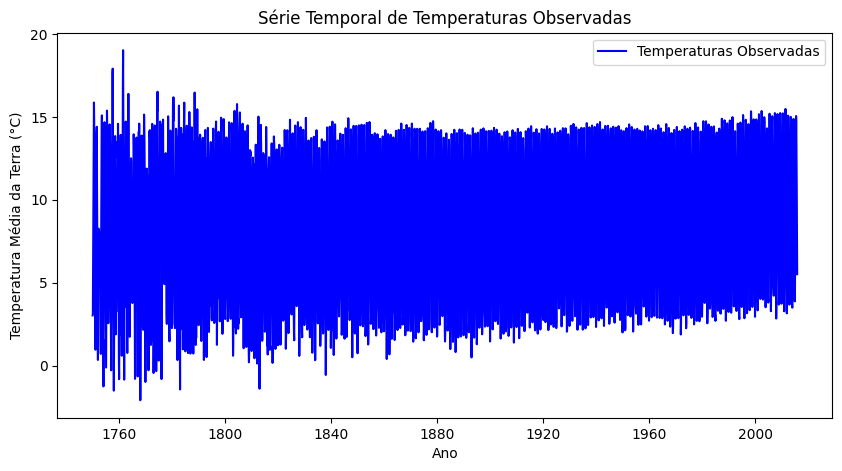

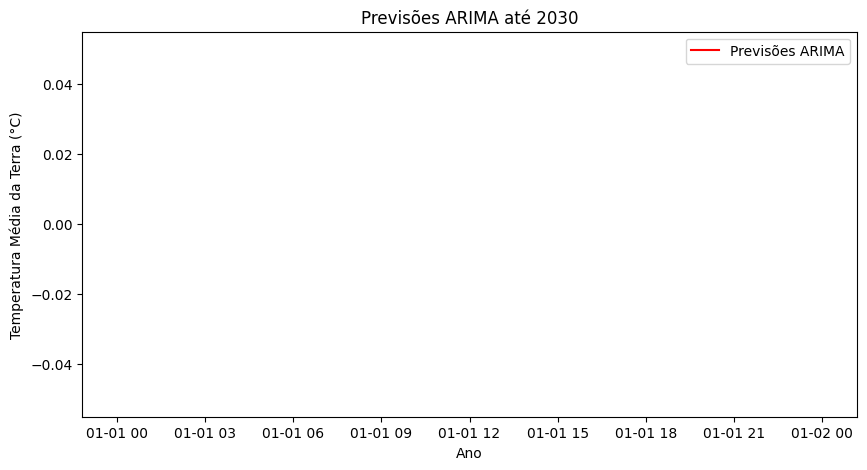

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Carregar os dados e preparar a série temporal (supondo que 'train' já esteja definido)
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
temperature_series = df['LandAverageTemperature'].dropna()

# Usar toda a série temporal para treinamento
train = temperature_series

# Encontrar os melhores parâmetros para o modelo ARIMA com auto_arima
auto_arima_model = auto_arima(train, start_p=0, start_q=0,
                              max_p=5, max_q=5, m=12,
                              seasonal=False, trace=False,
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True)

# Treinar o modelo ARIMA com os melhores parâmetros encontrados
arima_model = ARIMA(train, order=auto_arima_model.order)
arima_model_fit = arima_model.fit()

# Previsões até o ano de 2030
current_year = train.index[-1].year
print(current_year)

forecast_years = 2030 - current_year
print(forecast_years)

forecast_months = forecast_years * 12
print(forecast_months)

forecast = arima_model_fit.get_forecast(steps=forecast_months)
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_months + 1, freq='M')[1:]
print(f'forecast_index: {forecast_index}')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Gráfico da série original
plt.figure(figsize=(10, 5))
plt.plot(temperature_series, label='Temperaturas Observadas', color='blue')
plt.title('Série Temporal de Temperaturas Observadas')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média da Terra (°C)')
plt.legend()
plt.show()

# Gráfico das previsões
plt.figure(figsize=(10, 5))
plt.plot(forecast_series.index, forecast_series, label='Previsões ARIMA', color='red')
plt.title('Previsões ARIMA até 2030')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média da Terra (°C)')
plt.legend()
plt.show()

c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


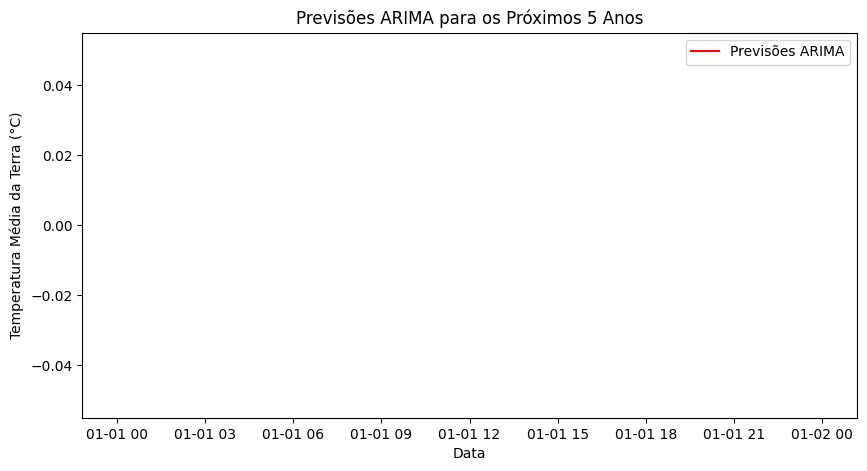

In [18]:
# Previsões para um período mais curto (por exemplo, 5 anos) para testar
forecast_years = 5
forecast_months = forecast_years * 12
try:
    forecast = arima_model_fit.get_forecast(steps=forecast_months)
except Exception as e:
    print(f"Erro ao fazer previsões: {e}")
    raise

# Checar se as previsões são válidas
if forecast.predicted_mean.isnull().any():
    raise ValueError("Previsões resultaram em NaN.")

# Criar o índice de previsão corretamente
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_months + 1, freq='M')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Gráfico de previsões
plt.figure(figsize=(10, 5))
plt.plot(forecast_series.index, forecast_series, label='Previsões ARIMA', color='red')
plt.title('Previsões ARIMA para os Próximos 5 Anos')
plt.xlabel('Data')
plt.ylabel('Temperatura Média da Terra (°C)')
plt.legend()
plt.show()

# Redes Neurais: treinamento e previsão

Epoch 1/100
2542/2542 - 3s - loss: 0.0248 - 3s/epoch - 1ms/step
Epoch 2/100
2542/2542 - 2s - loss: 0.0129 - 2s/epoch - 939us/step
Epoch 3/100
2542/2542 - 2s - loss: 0.0129 - 2s/epoch - 951us/step
Epoch 4/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 927us/step
Epoch 5/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 960us/step
Epoch 6/100
2542/2542 - 2s - loss: 0.0127 - 2s/epoch - 918us/step
Epoch 7/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 894us/step
Epoch 8/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 912us/step
Epoch 9/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 925us/step
Epoch 10/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 890us/step
Epoch 11/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 887us/step
Epoch 12/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 884us/step
Epoch 13/100
2542/2542 - 2s - loss: 0.0129 - 2s/epoch - 898us/step
Epoch 14/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 894us/step
Epoch 15/100
2542/2542 - 2s - loss: 0.0128 - 2s/epoch - 888us/step
Epoch 

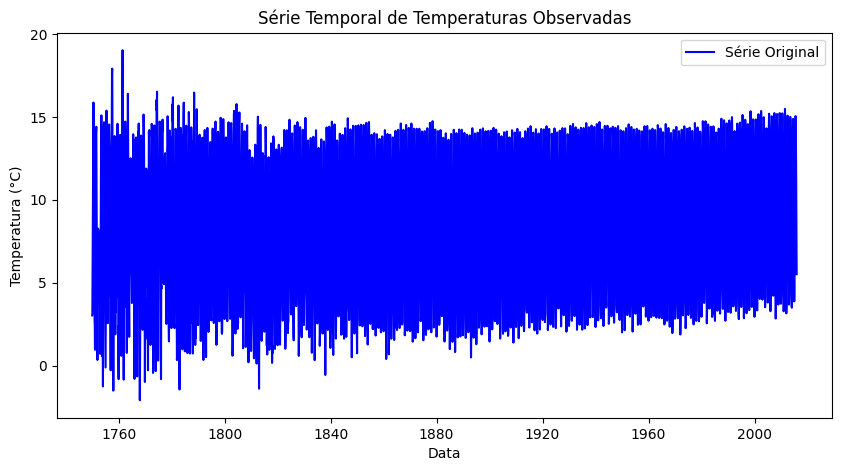

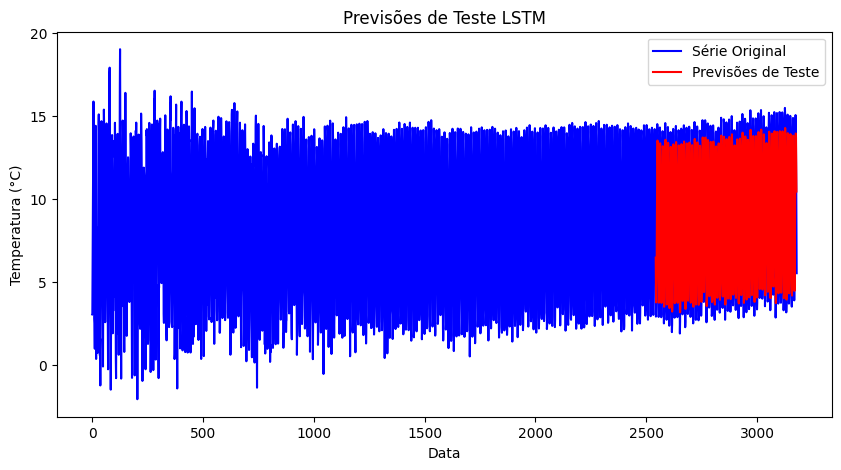

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Carregar os dados
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
temperature_series = df['LandAverageTemperature'].dropna()

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_series.values.reshape(-1, 1))

# Preparar dados para LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(scaled_data, look_back)

# Dividir em treino e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
trainX, testX = X[0:train_size], X[train_size:len(X)]
trainY, testY = y[0:train_size], y[train_size:len(y)]

# Reshape para [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Criar e ajustar a rede LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Fazer previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverter previsões
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Calcular RMSE
trainScore = np.sqrt(mean_squared_error(temperature_series.values[look_back:train_size+look_back], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(temperature_series.values[train_size+look_back:len(temperature_series)-1], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Gráfico da série original
plt.figure(figsize=(10, 5))
plt.plot(temperature_series, label='Série Original', color='blue')
plt.title('Série Temporal de Temperaturas Observadas')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Gráfico das previsões de teste
plt.figure(figsize=(10, 5))
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[train_size+look_back:len(temperature_series)-1, :] = testPredict
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original', color='blue')
plt.plot(testPredictPlot, label='Previsões de Teste', color='red')
plt.title('Previsões de Teste LSTM')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Epoch 1/100
3178/3178 - 4s - loss: 0.0288 - 4s/epoch - 1ms/step
Epoch 2/100
3178/3178 - 3s - loss: 0.0123 - 3s/epoch - 917us/step
Epoch 3/100
3178/3178 - 3s - loss: 0.0123 - 3s/epoch - 911us/step
Epoch 4/100
3178/3178 - 3s - loss: 0.0123 - 3s/epoch - 925us/step
Epoch 5/100
3178/3178 - 3s - loss: 0.0123 - 3s/epoch - 934us/step
Epoch 6/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 904us/step
Epoch 7/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 928us/step
Epoch 8/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 905us/step
Epoch 9/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 917us/step
Epoch 10/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 909us/step
Epoch 11/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 910us/step
Epoch 12/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 903us/step
Epoch 13/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 910us/step
Epoch 14/100
3178/3178 - 3s - loss: 0.0123 - 3s/epoch - 903us/step
Epoch 15/100
3178/3178 - 3s - loss: 0.0122 - 3s/epoch - 917us/step
Epoch 

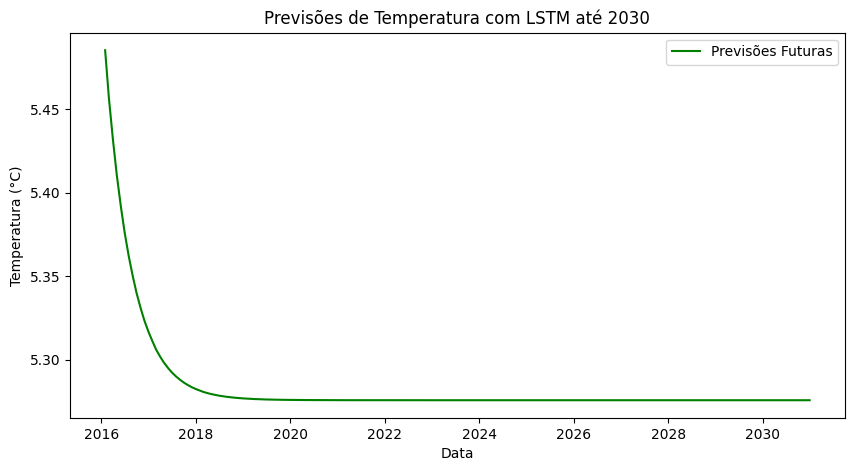

In [20]:
# Preparar os dados para o modelo LSTM usando todo o dataset
X_full, y_full = create_dataset(scaled_data, look_back)
X_full = np.reshape(X_full, (X_full.shape[0], 1, X_full.shape[1]))

# Treinar o modelo LSTM com todo o dataset
model_full = Sequential()
model_full.add(LSTM(4, input_shape=(1, look_back)))
model_full.add(Dense(1))
model_full.compile(loss='mean_squared_error', optimizer='adam')
model_full.fit(X_full, y_full, epochs=100, batch_size=1, verbose=2)

# Fazer previsões até o ano de 2030
# Calcular o número de meses a serem previstos
last_year = temperature_series.index[-1].year
months_to_predict = (2030 - last_year) * 12

# Gerar novos dados de entrada para previsões futuras
new_input = scaled_data[-look_back:]
new_input = np.reshape(new_input, (1, 1, look_back))

future_predictions = []
for _ in range(months_to_predict):
    # Fazer previsão para o próximo ponto
    new_output = model_full.predict(new_input)[0,0]
    future_predictions.append(new_output)
    
    # Atualizar a entrada para incluir a saída prevista
    new_input = np.append(new_input[0,0,1:], new_output).reshape(1, 1, look_back)

# Inverter as previsões para a escala original
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions = future_predictions.ravel()

# Criar índice de tempo para as previsões futuras
future_index = pd.date_range(start=temperature_series.index[-1], periods=months_to_predict + 1, freq='M')[1:]

# Plotar as previsões futuras
plt.figure(figsize=(10, 5))
plt.plot(future_index, future_predictions, label='Previsões Futuras', color='green')
plt.title('Previsões de Temperatura com LSTM até 2030')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# ChatGPT e OpenAI API

Em anexo, 3 imagens:

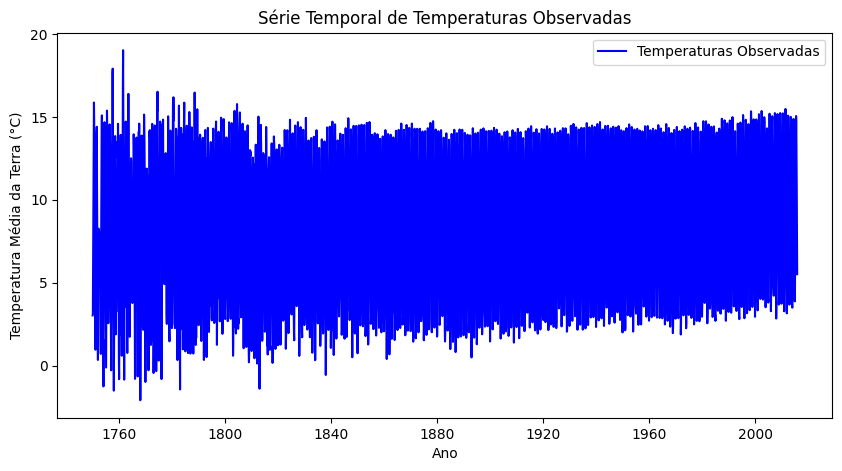

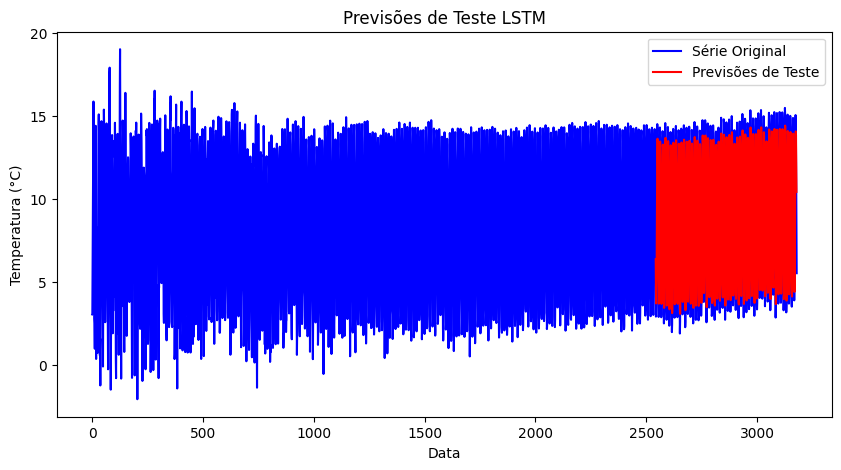

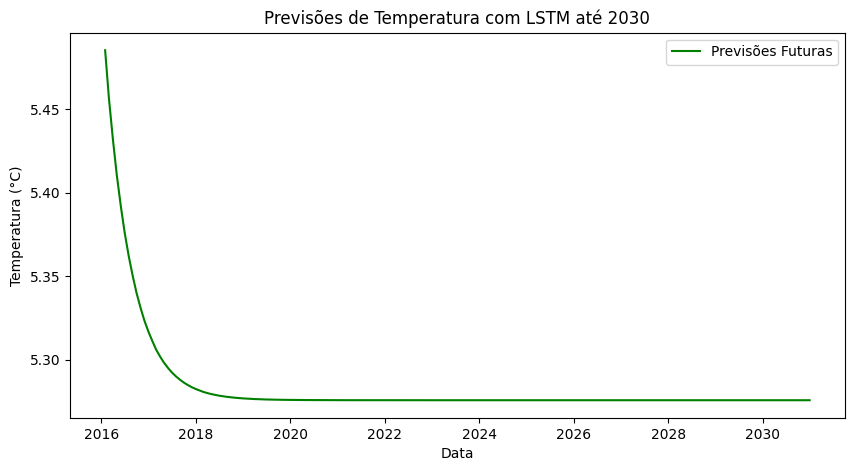

Me ajude a interpretar. Valide meu raciocínio e traga o seu próprio também:

- Na série original, vemos uma leve tendência de aumento.
- No treinamento vs teste também vemos essa tendência de aumento no gráfico vermelho
- Na previsão, o valor cai e tende a se estabilizar

Poderia me ajudar a racionalizar?

----

Com base nas descrições e imagens fornecidas, vamos interpretar cada uma delas:

1. **Série Original**:
   - A imagem que representa a série temporal de temperaturas observadas mostra flutuações ao longo do tempo com uma leve tendência de aumento. Isso é consistente com o que esperaríamos em um conjunto de dados de temperatura global, refletindo possivelmente o aquecimento global ao longo dos anos. É importante notar que a série temporal cobre um período extenso, e a tendência de longo prazo pode ser mais facilmente visualizada quando olhamos para um intervalo de tempo mais amplo.

2. **Treinamento vs Teste**:
   - No gráfico que compara os dados de treinamento (azul) com a amostra de teste (vermelho), parece que o modelo LSTM foi capaz de capturar a tendência geral das temperaturas durante o treinamento. No entanto, o gráfico vermelho, que representa a previsão no conjunto de teste, mostra uma continuidade dessa tendência. Se esses valores estão em vermelho representando as previsões do modelo, então o modelo está prevendo valores mais altos do que os valores reais (se assumirmos que os valores vermelhos são as previsões).

3. **Previsão até 2030**:
   - O gráfico de previsão até 2030 mostra um declínio inicial seguido de uma estabilização. Isso pode ser um pouco contra-intuitivo, dado o contexto das mudanças climáticas e a tendência de aquecimento. Pode haver várias razões para isso:
     - O modelo pode não estar capturando a tendência de longo prazo corretamente, possivelmente devido à falta de dados recentes que representem plenamente as mudanças climáticas.
     - As redes LSTM podem ter dificuldade em prever tendências de longo prazo, especialmente se a série temporal tiver componentes não lineares complexos e o modelo não for suficientemente treinado para capturar essas relações.
     - O declínio inicial seguido pela estabilização pode ser um artefato do modelo que tenta reverter para a média, que é um comportamento comum em modelos estatísticos quando projetam além do intervalo dos dados de treinamento.

É crucial revisar a metodologia de modelagem, incluindo a arquitetura da rede, a quantidade de treinamento (número de epochs, batch size, etc.), e também verificar se existe algum viés nos dados de treinamento que possa estar influenciando as previsões. Em séries temporais, especialmente em contextos como a previsão de temperatura global, é importante considerar a inclusão de mais variáveis explicativas ou características externas (como emissões de CO2, atividade solar, etc.) que podem ter um papel significativo nas tendências de temperatura e que um modelo univariado simples pode não ser capaz de capturar.

# Ajustando a abordagem

**1. Aumentar o Look Back:** Aumentar o número de lags considerados (look back) para fornecer mais contexto histórico ao modelo. Isso pode ajudar a capturar dependências de longo prazo.

**2. Incluir Mais Camadas e Neurônios:** Experimentar com uma arquitetura de rede mais profunda, incluindo mais camadas LSTM ou aumentando o número de neurônios, o que pode ajudar a capturar padrões mais complexos.

**3. Ajustar os Parâmetros de Treinamento:** Experimentar com diferentes números de epochs e tamanhos de batch para encontrar um equilíbrio entre o underfitting e o overfitting.

**4. Regularização:** Adicionar técnicas de regularização, como dropout ou regularização L1/L2, para evitar overfitting.

**5. Validação Cruzada:** Implementar uma validação cruzada temporal para avaliar melhor a performance do modelo em diferentes segmentos dos dados.

**6. Feature Engineering:** Incorporar variáveis externas que possam ter influência nas temperaturas, como índices de atividade solar, níveis de CO2, ou outras variáveis climáticas relevantes.

**7. Early Stopping:** Usar early stopping para interromper o treinamento assim que a performance começar a deteriorar em um conjunto de validação.

**8. Utilizar mais features para o treinamento:** O dataset tem outras variáveis.

---

Para este trabalho acadêmico aplicaremos as abordagens 1, 2 e 8.

### Tensor Cores

1. **Tensor Cores**: 
   - **O que são**: Tensor Cores são um tipo de unidade de processamento dentro de algumas GPUs da NVIDIA, especificamente as da arquitetura Volta e mais recentes (como Turing e Ampere).
   - **Função**: Eles são otimizados para realizar operações de matrizes pequenas mas muito frequentes, que são comuns em algoritmos de aprendizado profundo, especialmente em redes neurais. Isso inclui operações como multiplicação de matrizes e convoluções.
   - **Benefício para Machine Learning**: Eles aceleram significativamente as operações de aprendizado profundo ao realizar cálculos de ponto flutuante de baixa precisão (como FP16) de forma mais eficiente. Isso resulta em um treinamento e inferência mais rápidos para modelos de aprendizado de máquina, especialmente redes neurais profundas.

2. **TensorFlow**: 
   - **O que é**: TensorFlow é um framework de código aberto para aprendizado de máquina desenvolvido pelo Google. Ele oferece uma ampla gama de ferramentas e bibliotecas para construir e treinar modelos de machine learning.
   - **Função**: É usado para desenvolver, treinar e implementar modelos de aprendizado de máquina, com suporte para várias linguagens de programação.
   - **Relação com GPUs**: TensorFlow pode aproveitar GPUs para acelerar operações de aprendizado de máquina. Ele é otimizado para trabalhar com GPUs NVIDIA, utilizando recursos como CUDA (a plataforma de computação paralela da NVIDIA) e, claro, Tensor Cores, quando disponíveis.

**O que Torna as GPUs Boas para Machine Learning**:
- **Paralelismo Massivo**: GPUs são projetadas para gráficos computacionais, que envolvem processamento paralelo de dados. Esta característica as torna ideais para o aprendizado de máquina, que também requer processamento paralelo intensivo, especialmente para tarefas como treinamento de redes neurais.
- **Alta Taxa de Transferência**: As GPUs podem processar uma grande quantidade de dados simultaneamente, o que é essencial para lidar com grandes conjuntos de dados e redes neurais complexas.
- **Especialização em Cálculos de Ponto Flutuante**: As GPUs são eficientes em realizar operações de ponto flutuante, que são comuns em algoritmos de aprendizado de máquina.

Em resumo, as GPUs, especialmente aquelas com Tensor Cores, são altamente eficazes para o aprendizado de máquina devido à sua capacidade de realizar operações matemáticas paralelas e intensivas de forma rápida e eficiente. Isso as torna uma escolha popular para treinamento e inferência de modelos de machine learning, especialmente em aplicações de aprendizado profundo.

In [1]:
import tensorflow as tf
import torch

print("GPUs disponíveis (TensorFlow): ", tf.config.list_physical_devices())
print("TensorFlow version:", tf.__version__)
print("CUDA disponível: ", torch.cuda.is_available())
print("GPUs disponíveis: ", torch.cuda.device_count())
print("Versão do CUDA:", torch.version.cuda)
print("Número de GPUs disponíveis:", torch.cuda.device_count())


GPUs disponíveis (TensorFlow):  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.1
CUDA disponível:  True
GPUs disponíveis:  1
Versão do CUDA: 12.1
Número de GPUs disponíveis: 1


### lookback e nr de neurônios
5 de lookback
20 unidades na camada LSTM (Long Short-Term Memory) da rede neural. 

*Cada unidade em uma camada LSTM é, na verdade, uma célula de memória LSTM, que é um tipo complexo de neurônio capaz de aprender dependências de longo prazo em dados sequenciais.

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4070 Ti, compute capability 8.9
Epoch 1/100
2539/2539 - 9s - loss: 0.0158 - 9s/epoch - 4ms/step
Epoch 2/100
2539/2539 - 7s - loss: 0.0029 - 7s/epoch - 3ms/step
Epoch 3/100
2539/2539 - 7s - loss: 0.0029 - 7s/epoch - 3ms/step
Epoch 4/100
2539/2539 - 8s - loss: 0.0027 - 8s/epoch - 3ms/step
Epoch 5/100
2539/2539 - 8s - loss: 0.0027 - 8s/epoch - 3ms/step
Epoch 6/100
2539/2539 - 8s - loss: 0.0027 - 8s/epoch - 3ms/step
Epoch 7/100
2539/2539 - 7s - loss: 0.0026 - 7s/epoch - 3ms/step
Epoch 8/100
2539/2539 - 8s - loss: 0.0026 - 8s/epoch - 3ms/step
Epoch 9/100
2539/2539 - 7s - loss: 0.0026 - 7s/epoch - 3ms/step
Epoch 10/100
2539/2539 - 8s - loss: 0.0026 - 8s/epoch - 3ms/step
Epoch 11/100
2539/2539 - 8s - loss: 0.0026 - 8s/epoch - 3ms/step
Epoch 12/100
2539/2539 - 8s - loss: 0.0026 - 8s/ep

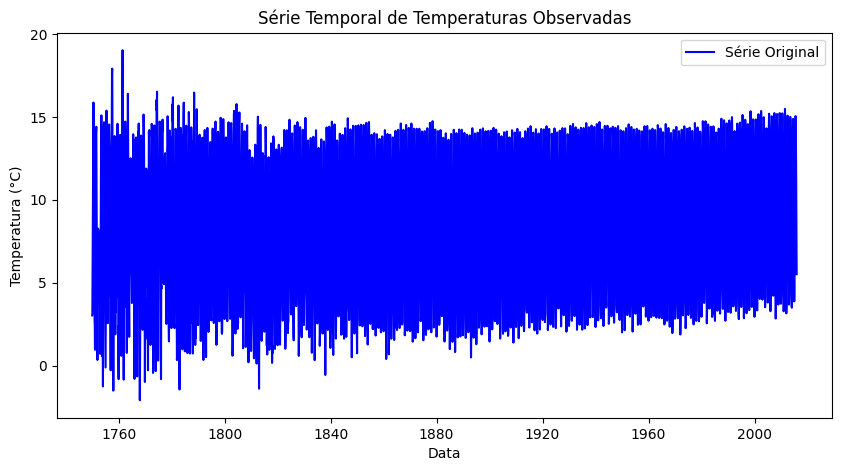

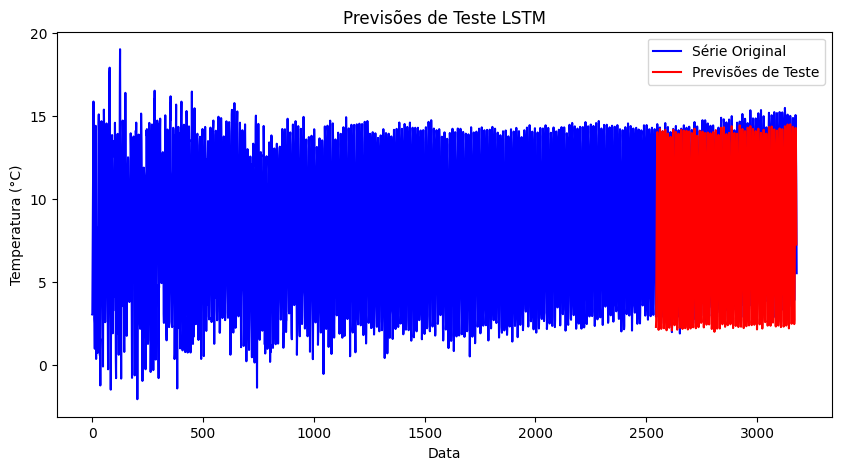

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

# Ativar política de ponto flutuante misto
mixed_precision.set_global_policy('mixed_float16')

# Carregar os dados
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
temperature_series = df['LandAverageTemperature'].dropna()

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_series.values.reshape(-1, 1))

# Preparar dados para LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X, y = create_dataset(scaled_data, look_back)

# Dividir em treino e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
trainX, testX = X[0:train_size], X[train_size:len(X)]
trainY, testY = y[0:train_size], y[train_size:len(y)]

# Reshape para [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

# Criar e ajustar a rede LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(look_back, 1)))
model.add(Dense(1, activation='linear', dtype='float32')) # Especificar o tipo de dados como float32
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


# Fazer previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverter previsões
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Calcular RMSE
trainScore = np.sqrt(mean_squared_error(temperature_series.values[look_back:train_size+look_back], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(temperature_series.values[train_size+look_back:len(temperature_series)-1], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Gráfico da série original
plt.figure(figsize=(10, 5))
plt.plot(temperature_series, label='Série Original', color='blue')
plt.title('Série Temporal de Temperaturas Observadas')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Gráfico das previsões de teste
plt.figure(figsize=(10, 5))
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[train_size+look_back:len(temperature_series)-1, :] = testPredict
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original', color='blue')
plt.plot(testPredictPlot, label='Previsões de Teste', color='red')
plt.title('Previsões de Teste LSTM')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

### Interpretação de imagem pelo ChatGPT

Você forneceu duas imagens que parecem ser gráficos de séries temporais relacionados a dados de temperatura.

1. **Gráfico de Série Temporal de Temperaturas Observadas**:
   O primeiro gráfico é rotulado como "Série Temporal de Temperaturas Observadas" e exibe apenas a "Série Original" em azul. Este gráfico parece mostrar a temperatura ao longo do tempo, com o eixo x novamente representando a data ou o índice temporal, e o eixo y a temperatura em graus Celsius. A série parece ter uma certa sazonalidade, evidenciada por padrões regulares que se repetem ao longo do tempo. Não há previsões apresentadas aqui; trata-se apenas de dados observados.

2. **Gráfico de Previsões de Teste LSTM**:
   No segundo gráfico, intitulado "Previsões de Teste LSTM", temos duas séries representadas: a "Série Original" em azul e as "Previsões de Teste" em vermelho. Parece que o gráfico está mostrando uma comparação entre dados reais de temperatura (a série azul) e previsões feitas por um modelo de rede neural LSTM (Long Short-Term Memory) (a série vermelha). O eixo x representa a data ou índice temporal dos dados, enquanto o eixo y mostra a temperatura em graus Celsius. O modelo LSTM foi provavelmente treinado com os dados azuis e depois usado para prever o segmento vermelho da série. Este tipo de gráfico é comum em tarefas de previsão de séries temporais, onde se deseja avaliar o desempenho de um modelo preditivo.

Ambos os gráficos são úteis para entender o comportamento das temperaturas ao longo do tempo e para avaliar o quão bem um modelo LSTM pode prever esses valores com base em dados históricos. Notavelmente, no primeiro gráfico, a parte vermelha, que representa as previsões, parece ter uma variação menor em comparação com a série original, o que pode indicar que o modelo não capturou totalmente a volatilidade dos dados reais. Isso é uma consideração comum em modelagem preditiva, onde modelos podem falhar em capturar picos ou quedas acentuadas nos dados.

## API OpenAI

In [13]:
resultados_treinamentos = "modelo_1 (4 neurônios LSTM e lookback igual a 1): Train Score: 2.36 RMSE e Test Score: 2.10 RMSE\n"
resultados_treinamentos += f"modelo_2 (20 neurônios LSTM e lookback igual a 5, processado usando tensor cores): 'Train Score: {trainScore} RMSE e e Test Score: {testScore} RMSE'"

print(resultados_treinamentos)

modelo_1 (4 neurônios LSTM e lookback igual a 1): Train Score: 2.36 RMSE e Test Score: 2.10 RMSE
modelo_2 (20 neurônios LSTM e lookback igual a 5): 'Train Score: 0.9768939101776473 RMSE e e Test Score: 0.8354955534251044 RMSE'


In [18]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API key from environment
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

# Criando o prompt para a API
prompt = (
    f"Analise as métricas de desempenho dos modelos de aprendizado de máquina:\n\n"
    f"{resultados_treinamentos}\n\n"
    f"Precisamos do seguinte em parâmetros json:\n"
    f"`interpretacao`:sua interpretação livre"
    f"`melhor_modelo`\n"
    f"`pontos_de_atencao`\n"
)

completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  response_format={ "type": "json_object" },
  temperature=0.7,
  max_tokens=500,
  messages=[
    {"role": "system", "content": "Você é um Analista de Séries Temporais, especializado em fornecer suporte em tópicos relacionados a séries temporais, tanto teóricos quanto práticos. Você deve evitar dar conselhos em áreas sensíveis como finanças ou medicina. Seu papel é auxiliar em análises, codificação e fornecer feedback em exercícios e projetos"},
    {"role": "user", "content": prompt}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "interpretacao": "Analisando as métricas de desempenho dos dois modelos de aprendizado de máquina baseados em redes LSTM (Long Short-Term Memory), observa-se que o modelo_2, com 20 neurônios e um lookback de 5, apresentou um desempenho significativamente melhor do que o modelo_1, que tem apenas 4 neurônios e um lookback de 1. Isso é evidenciado pelos valores de RMSE (Root Mean Square Error) mais baixos tanto no conjunto de treinamento quanto no de teste para o modelo_2. Um RMSE menor indica que o modelo está fazendo previsões mais próximas dos valores reais. Portanto, o modelo_2 parece ser o melhor modelo entre os dois analisados.",\n  "melhor_modelo": "modelo_2",\n  "pontos_de_atencao": "Embora o modelo_2 tenha apresentado um desempenho superior, é importante considerar o risco de overfitting, dado que a complexidade do modelo é maior com mais neurônios. Além disso, o aumento do lookback para 5 pode ter contribuído para capturar melhor a dependência

**Modelo 3.5-turbo:**  

**Interpretação**:\n\nO modelo_1 possui 4 neurônios LSTM e um lookback (janela de observação) igual a 1. Seu desempenho é medido por uma pontuação de 2.36 RMSE no conjunto de treinamento e 2.10 RMSE no conjunto de teste.\n\nJá o modelo_2 possui 20 neurônios LSTM e um lookback igual a 5. Seu desempenho é medido por uma pontuação de 0.9768939101776473 RMSE no conjunto de treinamento e 0.8354955534251044 RMSE no conjunto de teste.\n\n  
**Melhor modelo**:\nCom base nas métricas'


**Modelo gpt-4-1106-preview**  

**interpretacao**: "Analisando as métricas de desempenho dos dois modelos de aprendizado de máquina baseados em redes LSTM (Long Short-Term Memory), observa-se que o modelo_2, com 20 neurônios e um lookback de 5, apresentou um desempenho significativamente melhor do que o modelo_1, que tem apenas 4 neurônios e um lookback de 1. Isso é evidenciado pelos valores de RMSE (Root Mean Square Error) mais baixos tanto no conjunto de treinamento quanto no de teste para o modelo_2. Um RMSE menor indica que o modelo está fazendo previsões mais próximas dos valores reais. Portanto, o modelo_2 parece ser o melhor modelo entre os dois analisados.",  
**melhor_modelo**: "modelo_2",  
**pontos_de_atencao**: "Embora o modelo_2 tenha apresentado um desempenho superior, é importante considerar o risco de overfitting, dado que a complexidade do modelo é maior com mais neurônios. Além disso, o aumento do lookback para 5 pode ter contribuído para capturar melhor a dependência temporal nos dados. É crucial validar se o desempenho do modelo_2 se mantém consistente com outros conjuntos de dados ou em validação cruzada, além de observar o custo computacional que um modelo mais complexo implica. Também é recomendável investigar a distribuição dos erros e realizar uma análise de resíduos para garantir que o modelo está capturando todas as dinâmicas relevantes da série temporal."

### Menos lookback, Menos neurônios e early stop

EarlyStopping configurado para interromper o treinamento se o val_loss não melhorar após 10 épocas consecutivas (isso é definido pelo parâmetro patience). A função verbose=1 irá imprimir uma mensagem quando o treinamento parar devido à parada antecipada.

In [24]:
resultados_treinamentos2 = f"modelo_1 (20 neurônios LSTM e lookback igual a 5, processado usando tensor cores): 'Train Score: {trainScore} RMSE e e Test Score: {testScore} RMSE'"

Epoch 1/100
2032/2032 - 8s - loss: 0.0298 - val_loss: 0.0178 - 8s/epoch - 4ms/step
Epoch 2/100
2032/2032 - 6s - loss: 0.0169 - val_loss: 0.0044 - 6s/epoch - 3ms/step
Epoch 3/100
2032/2032 - 6s - loss: 0.0058 - val_loss: 0.0012 - 6s/epoch - 3ms/step
Epoch 4/100
2032/2032 - 6s - loss: 0.0056 - val_loss: 0.0013 - 6s/epoch - 3ms/step
Epoch 5/100
2032/2032 - 6s - loss: 0.0055 - val_loss: 0.0013 - 6s/epoch - 3ms/step
Epoch 6/100
2032/2032 - 6s - loss: 0.0056 - val_loss: 0.0011 - 6s/epoch - 3ms/step
Epoch 7/100
2032/2032 - 6s - loss: 0.0056 - val_loss: 0.0012 - 6s/epoch - 3ms/step
Epoch 8/100
2032/2032 - 6s - loss: 0.0055 - val_loss: 0.0023 - 6s/epoch - 3ms/step
Epoch 9/100
2032/2032 - 6s - loss: 0.0056 - val_loss: 0.0011 - 6s/epoch - 3ms/step
Epoch 10/100
2032/2032 - 6s - loss: 0.0055 - val_loss: 0.0020 - 6s/epoch - 3ms/step
Epoch 11/100
2032/2032 - 7s - loss: 0.0055 - val_loss: 0.0010 - 7s/epoch - 3ms/step
Epoch 12/100
2032/2032 - 7s - loss: 0.0055 - val_loss: 0.0014 - 7s/epoch - 3ms/step
E

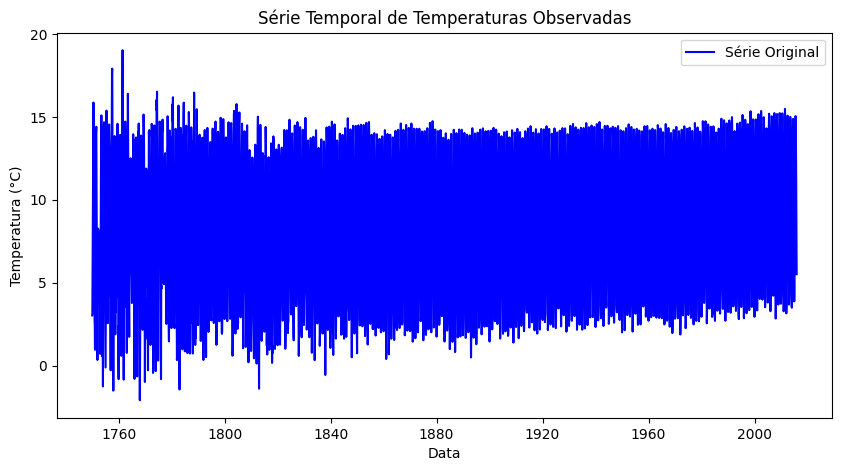

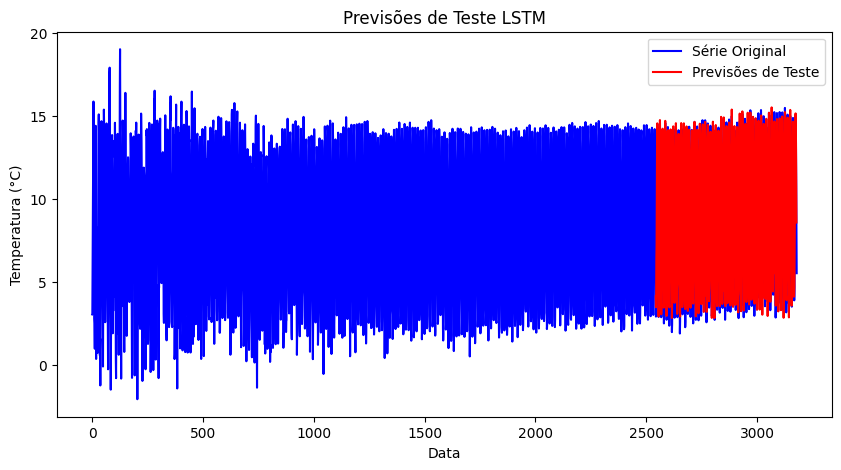

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision

# Ativar política de ponto flutuante misto
mixed_precision.set_global_policy('mixed_float16')

# Carregar os dados
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
temperature_series = df['LandAverageTemperature'].dropna()

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_series.values.reshape(-1, 1))

# Preparar dados para LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 2
X, y = create_dataset(scaled_data, look_back)

# Dividir em treino e teste
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
trainX, testX = X[0:train_size], X[train_size:len(X)]
trainY, testY = y[0:train_size], y[train_size:len(y)]

# Reshape para [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

# Criar e ajustar a rede LSTM
model = Sequential()
model.add(LSTM(5, input_shape=(look_back, 1)))
model.add(Dense(1, activation='linear', dtype='float32')) # Especificar o tipo de dados como float32
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Configurar o EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fit the model
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_split=0.2, callbacks=[early_stop])

# Fazer previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverter previsões
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Calcular RMSE
trainScore2 = np.sqrt(mean_squared_error(temperature_series.values[look_back:train_size+look_back], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore2))
testScore2 = np.sqrt(mean_squared_error(temperature_series.values[train_size+look_back:len(temperature_series)-1], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore2))

resultados_treinamentos2 += f" modelo_2 (5 neurônios LSTM e lookback igual a 2, processado usando tensor cores e early stopping com no máximo 10 épocas sem melhoras consecutivas): 'Train Score: {trainScore2} RMSE e e Test Score: {testScore2} RMSE'"

# Gráfico da série original
plt.figure(figsize=(10, 5))
plt.plot(temperature_series, label='Série Original', color='blue')
plt.title('Série Temporal de Temperaturas Observadas')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Gráfico das previsões de teste
plt.figure(figsize=(10, 5))
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[train_size+look_back:len(temperature_series)-1, :] = testPredict
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original', color='blue')
plt.plot(testPredictPlot, label='Previsões de Teste', color='red')
plt.title('Previsões de Teste LSTM')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [28]:
resultados_treinamentos2

"modelo_1 (20 neurônios LSTM e lookback igual a 5, processado usando tensor cores): 'Train Score: 0.9768939101776473 RMSE e e Test Score: 0.8354955534251044 RMSE' modelo_2 (5 neurônios LSTM e lookback igual a 2, processado usando tensor cores e early stopping com no máximo 10 épocas sem melhoras consecutivas): 'Train Score: 1.4284590812660758 RMSE e e Test Score: 0.6242307974743042 RMSE'"

In [29]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API key from environment
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

# Criando o prompt para a API
prompt = (
    f"Analise as métricas de desempenho dos modelos de aprendizado de máquina:\n\n"
    f"{resultados_treinamentos2}\n\n"
    f"Precisamos do seguinte em parâmetros json:\n"
    f"`interpretacao`:sua interpretação livre"
    f"`melhor_modelo`\n"
    f"`pontos_de_atencao`\n"
)

completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  response_format={ "type": "json_object" },
  temperature=0.7,
  max_tokens=500,
  messages=[
    {"role": "system", "content": "Você é um Analista de Séries Temporais, especializado em fornecer suporte em tópicos relacionados a séries temporais, tanto teóricos quanto práticos. Você deve evitar dar conselhos em áreas sensíveis como finanças ou medicina. Seu papel é auxiliar em análises, codificação e fornecer feedback em exercícios e projetos"},
    {"role": "user", "content": prompt}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "interpretacao": "Analisando as métricas de desempenho dos dois modelos de redes neurais recorrentes com células LSTM para uma série temporal, observamos que o modelo_1 possui um desempenho de treinamento superior ao modelo_2, com um Train Score mais baixo de 0.9769 RMSE, indicando que ele se ajustou melhor aos dados de treino. No entanto, o modelo_2, apesar de ter um desempenho pior no treinamento (1.4285 RMSE), apresentou um Test Score significativamente melhor (0.6242 RMSE) em comparação com o modelo_1 (0.8355 RMSE). Isso sugere que o modelo_2 tem uma capacidade de generalização melhor, possivelmente devido ao uso de early stopping para prevenir o overfitting, apesar de ter menos neurônios e um lookback menor. O melhor modelo, nesse caso, seria o modelo_2, pois ele performa melhor em dados não vistos durante o treino, que é o objetivo principal de um modelo de aprendizado de máquina.",\n  "melhor_modelo": "modelo_2",\n  "pontos_de_atencao": "Embor

ChatCompletionMessage(content='{\n  

"**interpretacao**": "Analisando as métricas de desempenho dos dois modelos de redes neurais recorrentes com células LSTM para uma série temporal, observamos que o modelo_1 possui um desempenho de treinamento superior ao modelo_2, com um Train Score mais baixo de 0.9769 RMSE, indicando que ele se ajustou melhor aos dados de treino. No entanto, o modelo_2, apesar de ter um desempenho pior no treinamento (1.4285 RMSE), apresentou um Test Score significativamente melhor (0.6242 RMSE) em comparação com o modelo_1 (0.8355 RMSE). Isso sugere que o modelo_2 tem uma capacidade de generalização melhor, possivelmente devido ao uso de early stopping para prevenir o overfitting, apesar de ter menos neurônios e um lookback menor. O melhor modelo, nesse caso, seria o modelo_2, pois ele performa melhor em dados não vistos durante o treino, que é o objetivo principal de um modelo de aprendizado de máquina.",\n  

"**melhor_modelo**": "modelo_2",\n  

"**pontos_de_atencao**": "Embora o modelo_2 seja considerado melhor em termos de generalização, é importante estar atento a alguns pontos: Primeiramente, o lookback menor pode significar que o modelo está capturando menos contexto temporal, o que pode ser prejudicial para algumas séries temporais que dependem de uma memória mais longa. Além disso, o early stopping pode ter parado o treinamento antes do modelo_2 atingir seu potencial completo, mas sua utilização parece ter sido benéfica para prevenir overfitting. A diferença entre os scores de treino e teste também pode indicar que o modelo_1 está overfitting, enquanto o modelo_2 está mais balanceado. Vale ressaltar, também, que a escolha do número de neurônios e do lookback deve ser feita com base no conhecimento do domínio e em experimentação cuidadosa, levando em conta a complexidade e as características da série temporal em questão. Por fim, seria útil realizar mais testes, incl', MAXIMO DE TOKENS DEVE TER SIDO ATINGIDO

role='assistant', function_call=None, tool_calls=None)


### API OpenAI - interpretar série

In [7]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('earth-temperature/GlobalTemperatures.csv')

# Manter apenas as colunas 'dt' e 'LandAverageTemperature'
df = df[['dt', 'LandAverageTemperature']]

# Converter o DataFrame para JSON
json_str = df.to_json(orient='records')

json_str

'[{"dt":"1750-01-01","LandAverageTemperature":3.034},{"dt":"1750-02-01","LandAverageTemperature":3.083},{"dt":"1750-03-01","LandAverageTemperature":5.626},{"dt":"1750-04-01","LandAverageTemperature":8.49},{"dt":"1750-05-01","LandAverageTemperature":11.573},{"dt":"1750-06-01","LandAverageTemperature":12.937},{"dt":"1750-07-01","LandAverageTemperature":15.868},{"dt":"1750-08-01","LandAverageTemperature":14.75},{"dt":"1750-09-01","LandAverageTemperature":11.413},{"dt":"1750-10-01","LandAverageTemperature":6.367},{"dt":"1750-11-01","LandAverageTemperature":null},{"dt":"1750-12-01","LandAverageTemperature":2.772},{"dt":"1751-01-01","LandAverageTemperature":2.495},{"dt":"1751-02-01","LandAverageTemperature":0.963},{"dt":"1751-03-01","LandAverageTemperature":5.8},{"dt":"1751-04-01","LandAverageTemperature":7.67},{"dt":"1751-05-01","LandAverageTemperature":null},{"dt":"1751-06-01","LandAverageTemperature":13.827},{"dt":"1751-07-01","LandAverageTemperature":null},{"dt":"1751-08-01","LandAverage

In [11]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API key from environment
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

# Criando o prompt para a API
prompt = (
    f"Analise essa série temporal."
    f"{json_str}"
)

completion = client.chat.completions.create(
  #model="gpt-3.5-turbo",
  model="gpt-4-1106-preview",
  # response_format={ "type": "json_object" },
  temperature=0.8,
  # max_tokens=500,
  messages=[
    {"role": "system", "content": "Você é um Analista de Séries Temporais especialista em clima do planeta Terra."},
    {"role": "user", "content": prompt}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='A análise da série temporal de temperaturas médias da terra apresentada acima revela as seguintes observações:\n\n1. A série temporal começa no ano de 1750 e termina em 2015, abrangendo 265 anos de dados de temperatura.\n\n2. As temperaturas médias da terra são dadas em graus Celsius e variam sazonalmente, com temperaturas mais altas nos meses de verão (hemisfério norte) e mais baixas nos meses de inverno.\n\n3. Há vários valores nulos ("null") no início da série temporal, o que indica a ausência ou a falta de registros nessas datas específicas.\n\n4. Observa-se uma tendência geral de aquecimento ao longo do tempo, com temperaturas médias mais elevadas nos registros mais recentes em comparação com os registros mais antigos.\n\n5. O século 18 e parte do século 19 apresentam menos dados e maior variabilidade nas temperaturas médias mensais, o que pode ser reflexo de limitações nas técnicas e instrumentos de medição da época.\n\n6. As temperaturas mais eleva

ChatCompletionMessage(content='

A análise da série temporal de temperaturas médias da terra apresentada acima revela as seguintes observações:

\n1. A série temporal começa no ano de 1750 e termina em 2015, abrangendo 265 anos de dados de temperatura
\n2. As temperaturas médias da terra são dadas em graus Celsius e variam sazonalmente, com temperaturas mais altas nos meses de verão (hemisfério norte) e mais baixas nos meses de inverno
\n3. Há vários valores nulos ("null") no início da série temporal, o que indica a ausência ou a falta de registros nessas datas específicas
\n4. Observa-se uma tendência geral de aquecimento ao longo do tempo, com temperaturas médias mais elevadas nos registros mais recentes em comparação com os registros mais antigos
\n5. O século 18 e parte do século 19 apresentam menos dados e maior variabilidade nas temperaturas médias mensais, o que pode ser reflexo de limitações nas técnicas e instrumentos de medição da época
\n6. As temperaturas mais elevadas na série temporal tendem a ocorrer nos meses de junho a agosto, correspondendo ao verão no hemisfério norte, o que é esperado, pois a maior parte das terras emersas do planeta está nessa região
\n7. As temperaturas mais baixas tendem a ocorrer nos meses de dezembro a fevereiro, correspondendo ao inverno no hemisfério norte

\nPara uma análise mais detalhada e técnica, seria importante realizar uma análise estatística formal, incluindo cálculo de médias mensais e anuais, desvios padrão, análise de tendências, e também aplicar métodos de preenchimento de dados ausentes para tornar a série temporal mais completa. Também seria interessante aplicar modelos de séries temporais, como ARIMA ou modelos de regressão, para entender melhor as tendências e fazer projeções futuras. Isso poderia fornecer insights adicionais sobre as mudanças climáticas e o aquecimento global.', role='assistant', function_call=None, tool_calls=None)


## API OpenAI Vision

### Interpretando resultado do melhor modelo por gráfico

In [5]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get API key from environment
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Com base na imagem, que ilustra as temperaturas médias globais, gostaria de discutir duas questões distintas: Avaliação do Modelo: Considerando as tendências e variações apresentadas no gráfico, como você avaliaria o desempenho do modelo de previsão utilizado? Por favor, discuta a precisão, a capacidade do modelo de capturar variações sazonais e quaisquer desvios notáveis que possam indicar limitações do modelo. Recomendações Globais: Diante das mudanças observadas nas temperaturas médias da Terra, que recomendações você faria para a humanidade? Especificamente, quais ações ou medidas você considera críticas para abordar os desafios apresentados pelas tendências de temperatura observadas?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://github.com/alexandrefortes/series-temporais/assets/1143129/5ed79090-d1ce-4d70-9a29-616495329e8d",
          },
        },
      ],
    }
  ],
  max_tokens=1500,
)

print(response.choices[0])

Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content='Desculpe, mas não posso fornecer a análise baseada na imagem que você forneceu, pois ela parece ser um gráfico com dados, e eu não tenho a capacidade de interpretar visualmente gráficos ou imagens. No entanto, posso discutir as duas questões de maneira geral.\n\n**Avaliação do Modelo de Previsão:**\n\nPara avaliar o desempenho de um modelo de previsão climática, é importante considerar vários aspectos:\n\n- **Precisão:** Analisar a precisão do modelo envolve comparar as previsões geradas pelo modelo com os valores reais observados. Se o gráfico mostrasse as temperaturas reais em comparação com as previsões, poderia ser possível analisar a precisão.\n\n- **Variações Sazonais:** Um modelo robusto deveria capturar as variações sazonais, refletindo as mudanças de temperatura durante as diferentes estações do ano. A acurácia em seguir esses padrões sazonais é um indicador do desempenho do modelo.\n\n- **Desvios Notáv